# Наша первая свёрточная нейросеть 

Пришло время построить нашу первую свёрточную нейросеть. Будем использовать для этого датасет [fashion MNIST.](https://www.cs.toronto.edu/~kriz/cifar.html) Набор данных включает в себя изображения рукописных цифр.  

<img src="https://pbs.twimg.com/media/DVhOyJ1XkAACKqT.jpg" style="width:70%">

In [1]:
import tensorflow

In [2]:
! pip install tqdm

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers as L

import numpy as np
import random
from tqdm import tqdm

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Смотрим на данные 

Скачаеми приготовим данные. Буквально через минуту в наших руках окажутся $60 000$ картинок размера $28 \times 28$.

In [4]:
fashion_mnist = tensorflow.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Отнормировали данные к отрезку [0;1]
# X_train = X_train/ 255.
# X_test = X_test/ 255.

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
print("Train samples:", X_train.shape, y_train.shape)
print("Test samples:", X_test.shape, y_test.shape)

Train samples: (60000, 28, 28) (60000,)
Test samples: (10000, 28, 28) (10000,)


Нарисуем несколько рандомных картинок из тренировочной выборки. 

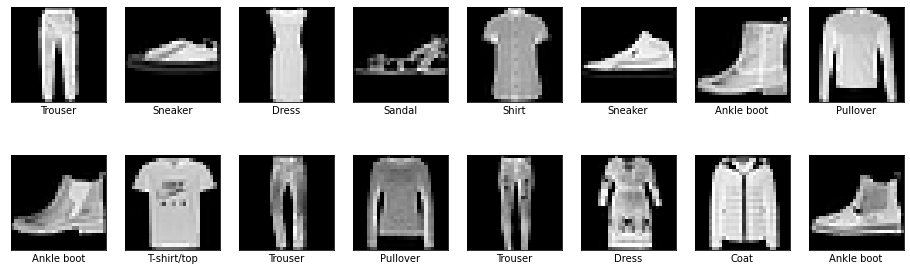

In [6]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols, 2.5 * rows))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(X_train[random_index, :], cmap = 'gray')
        ax.set_xlabel(class_names[y_train[random_index]])
plt.show()

## 2.  Выбираем для нашей нейросети архитектуру

Свёрточная нейронная сеть строится из нескольких разных типов слоёв: 

* [Conv2D](https://keras.io/layers/convolutional/#conv2d) - Конволюция:
    - **filters**: число выходных каналов; 
    - **kernel_size**: размер окна для свёртки;
    - **padding**: padding="same" добавляет нулевую каёмку по краям картинки, чтбы после свёртки размеры картинки не изменялись; padding='valid' ничего не добавляет;
    - **activation**: "relu", "tanh", etc.
    - **input_shape**: размер входа
* [MaxPooling2D](https://keras.io/layers/pooling/#maxpooling2d) - макспулинг
* [Flatten](https://keras.io/layers/core/#flatten) - разворачивает картинку в вектор 
* [Dense](https://keras.io/layers/core/#dense) - полносвязный слой (fully-connected layer)
* [Activation](https://keras.io/layers/core/#activation) - функция активации
* [LeakyReLU](https://keras.io/layers/advanced-activations/#leakyrelu) - leaky relu активация
* [Dropout](https://keras.io/layers/core/#dropout) - дропаут.


В модели, которую мы определим ниже, на вход будет идти тензоры размера __(None, 28, 28, 1)__ и __(None, 10)__. На выходе мы будем получать вероятноть того, что объект относится к конкретному классу. Размерность __None__ заготовлена для размерности батча. 

## 2.1 Полносвязная сетка 

Соберём полносвязную сетку / 

In [7]:
tensorflow.random.set_seed(42)

model_1 = Sequential( )

model_1.add(L.Flatten(input_shape=(28, 28)))

model_1.add(L.Dense(64))
model_1.add(L.BatchNormalization()) 
model_1.add(L.Activation('relu'))

model_1.add(L.Dense(32))
model_1.add(L.BatchNormalization()) 
model_1.add(L.Activation('relu'))

model_1.add(L.Dense(16))
model_1.add(L.BatchNormalization()) 
model_1.add(L.Activation('relu'))

model_1.add(L.Dense(10, activation='softmax'))

model_1.compile("adam", "sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])

hist = model_1.fit(X_train, y_train, validation_split= 0.2,
                        batch_size=500, epochs=10, verbose=1)

Epoch 1/10
96/96 [==============================] - 1s 5ms/step - loss: 1.2319 - sparse_categorical_accuracy: 0.7020 - val_loss: 1.0399 - val_sparse_categorical_accuracy: 0.7978
Epoch 2/10
96/96 [==============================] - 0s 4ms/step - loss: 0.6521 - sparse_categorical_accuracy: 0.8447 - val_loss: 0.6704 - val_sparse_categorical_accuracy: 0.8428
Epoch 3/10
96/96 [==============================] - 0s 4ms/step - loss: 0.4656 - sparse_categorical_accuracy: 0.8671 - val_loss: 0.5106 - val_sparse_categorical_accuracy: 0.8391
Epoch 4/10
96/96 [==============================] - 0s 3ms/step - loss: 0.3884 - sparse_categorical_accuracy: 0.8784 - val_loss: 0.4696 - val_sparse_categorical_accuracy: 0.8384
Epoch 5/10
96/96 [==============================] - 0s 4ms/step - loss: 0.3464 - sparse_categorical_accuracy: 0.8867 - val_loss: 0.4414 - val_sparse_categorical_accuracy: 0.8507
Epoch 6/10
96/96 [==============================] - 0s 4ms/step - loss: 0.3178 - sparse_categorical_accuracy: 

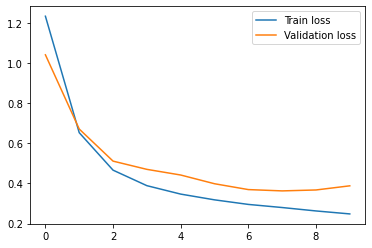

In [8]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Train loss', 'Validation loss'])

In [9]:
print("\nLoss, Accuracy = ", model_1.evaluate(X_test, y_test, verbose=0))


Loss, Accuracy =  [0.4049498438835144, 0.8589000105857849]


* Посмотрите на качество получившейся модели. Вернитесь по коду вверх и раскоментируйте строки, где картинки нормируются к отрезку $[0;1]$. Переобучите сетку. Что произошло с качеством? 
* Теперь попробуйте использовать в качестве функции активации линейную функцию. Что произошло с качеством модели?  

Можно посмотреть, где именно сетка ошибается. 

In [13]:
np.argmax(model_1.predict(X_test), axis=1)

array([9, 2, 1, ..., 8, 1, 5])

In [14]:
y_pred = np.argmax(model_1.predict(X_test), axis=1)
errors =  y_pred != y_test

# срежем только наблюдения, где была ошибка вместе с метками
X_err = X_test[errors]
y_err = y_test[errors]
y_pred = y_pred[errors]

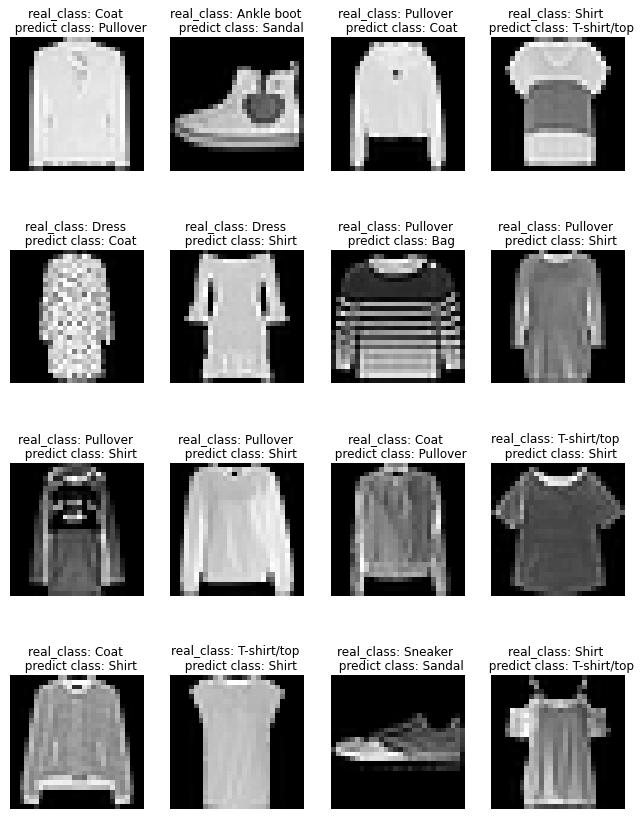

In [15]:
cols = 4
rows = 4
fig = plt.figure(figsize=(3 * cols - 1, 4 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_err))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(X_err[random_index, : ], cmap='gray')
        ax.set_title('real_class: {} \n  predict class: {}'.format(class_names[y_err[random_index]], 
                                                                   class_names[y_pred[random_index]]))
plt.show()

## 2.2 Свёрточная сетка 

Во-первых, нужно в явном виде указать, что у нас в изображениях один канал. Иначе питон будет ругаться.

In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
X_train[:,:,:,np.newaxis].shape

(60000, 28, 28, 1)

In [18]:
X_train = X_train[:,:,:,np.newaxis]
X_test = X_test[:,:,:,np.newaxis]

Теперь давайте соберём свёртоную сеть: 

* Свёртка с ядром $5 \times 5$, same padding и $32$ каналами
* ReLU
* Макспулинг размера $2 \times 2$
* Свёртка с ядром $5 \times 5$ и $16$ каналами  и same padding
* ReLU
* Макспулинг размера $2 \times 2$ с шагом (strides) $2$ по обеим осям 
* Дальше сделайте `Flatten` и сделайте два полносвязных слоя с ReLU и $120$ и $60$ нейронами

In [19]:
tensorflow.random.set_seed(42)
model_2 = Sequential( )

model_2.add(L.Conv2D(32, kernel_size=(5, 5),padding="same", 
                   input_shape=(28, 28, 1)))

model_2.add(L.Activation("relu"))
model_2.add(L.MaxPooling2D( pool_size=(2,2)))

model_2.add(L.Conv2D(16, kernel_size=(5, 5), padding="same"))
model_2.add(L.Activation("relu"))
model_2.add(L.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model_2.add(L.Flatten()) 

model_2.add(L.Dense(120))
model_2.add(L.Activation('relu'))

model_2.add(L.Dense(60))
model_2.add(L.Activation('relu'))

model_2.add(L.Dense(10, activation='softmax'))
model_2.compile("adam", "sparse_categorical_crossentropy", 
                metrics=["sparse_categorical_accuracy"])


hist = model_2.fit(X_train, y_train, validation_split=0.2, 
                   batch_size=500, epochs=10, verbose=1)

Epoch 1/10
96/96 [==============================] - 21s 215ms/step - loss: 1.8475 - sparse_categorical_accuracy: 0.6796 - val_loss: 0.5384 - val_sparse_categorical_accuracy: 0.8117
Epoch 2/10
96/96 [==============================] - 20s 210ms/step - loss: 0.4677 - sparse_categorical_accuracy: 0.8357 - val_loss: 0.4340 - val_sparse_categorical_accuracy: 0.8437
Epoch 3/10
96/96 [==============================] - 20s 209ms/step - loss: 0.3872 - sparse_categorical_accuracy: 0.8609 - val_loss: 0.3964 - val_sparse_categorical_accuracy: 0.8553
Epoch 4/10
96/96 [==============================] - 19s 203ms/step - loss: 0.3406 - sparse_categorical_accuracy: 0.8782 - val_loss: 0.3771 - val_sparse_categorical_accuracy: 0.8652
Epoch 5/10
96/96 [==============================] - 20s 209ms/step - loss: 0.3070 - sparse_categorical_accuracy: 0.8890 - val_loss: 0.3445 - val_sparse_categorical_accuracy: 0.8773
Epoch 6/10
96/96 [==============================] - 20s 205ms/step - loss: 0.2854 - sparse_cate

In [20]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 activation_3 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        12816     
                                                                 
 activation_4 (Activation)   (None, 14, 14, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                  

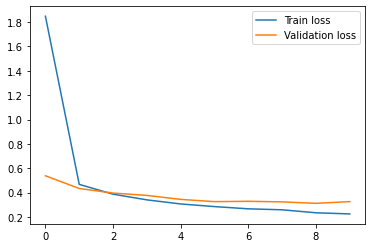

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Train loss', 'Validation loss'])

In [22]:
print("\nLoss, Accuracy = ", model_2.evaluate(X_test, y_test, verbose=0))


Loss, Accuracy =  [0.34047889709472656, 0.8806999921798706]


Как видите, точность довольно сильно подскочила. Попробуйте поиграться числом параметров и слоёв так, чтобы их стало меньше, а качество сетки стало лучше. Попробуйте обучать нейросетку большее количество эпох. 

Снова посмотрим на ошибки. 

In [23]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
np.squeeze(X_test, axis=3).shape

In [ ]:
y_pred = np.argmax(model_2.predict(X_test), axis=1)
errors =  y_pred != y_test

X_err = np.squeeze(X_test[errors], axis=3)
y_err = y_test[errors]
y_pred = y_pred[errors]

In [ ]:
cols = 4
rows = 4
fig = plt.figure(figsize=(3 * cols - 1, 4 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_err))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(X_err[random_index, : ], cmap='gray')
        ax.set_title('real_class: {} \n  predict class: {}'.format(class_names[y_err[random_index]], 
                                                                   class_names[y_pred[random_index]]))
plt.show()